## Analysis Overview:

- Import Libraries
- Data Description and null value check
- Univariate Analysis
- Null value Treatment and Outlier Treatment
- Applying Logistic Regression model
- Statistical Analysis
- ROC Curve
- Thresold value Identification- Accuracy,sensitivity and specificty curve
- validation Test data

## 1. Importing Required Libraries

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## 2.Reading the Leads.csv file 

In [3]:
#Read csv and store in data and  display top 5 rows of the dataframe
data=pd.read_csv('Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 3.Data Description

In [4]:
data.shape

(9240, 37)

## Observation:
- We have 9240 row sand 37 columns

In [5]:
# Display non-null,datatype of eacch feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Insights:

- Majority of the columns are in object dattatype and we could see they are as expected.Since the columns/features are actually categorical datatype is Object

In [6]:
# statistical summary  of the data
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Insights:
- We have very less number of features with integer/Float datatype so only 7 features has been displyed in the statistical summary
- By observing the count we could see there are null values present in the data. we will handle them in further steps

## Data Preparation and EDA

## EDA

### Categorical vs Target

In [7]:
# Reusable method for plotting count plot for multiple features
def uni_anal(x,rotationvalue):
    plt.figure(figsize=(10,6))
    plt.title('Distribution of Catgeories in '+ x+ ' Feature',size=15,color='Green')
    sns.countplot(x=x,hue='Converted',data=data)
    plt.xticks(rotation=rotationvalue)

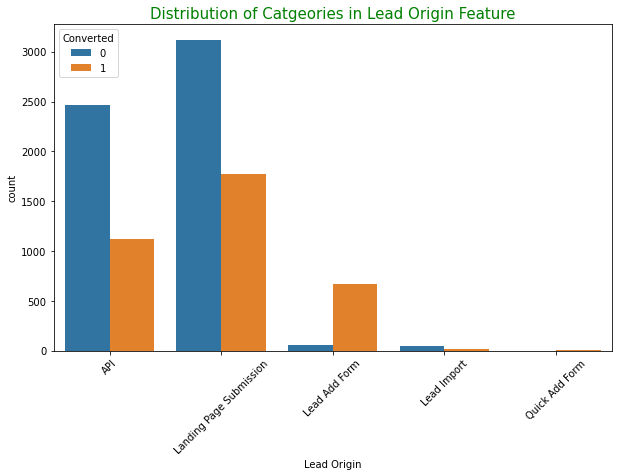

In [8]:
uni_anal('Lead Origin',45)

## Insights:
- Lead Origin indiactes the origin identifier with which the customer was identified to be a lead.
- Among the 5 categories of Lead Origin `Landing Api Submission` and `API` plays a key role
- `Lead Import` and `Quick Add Form` has a very less count on the scale lets treat them in further steps.since the catgeories are skewed

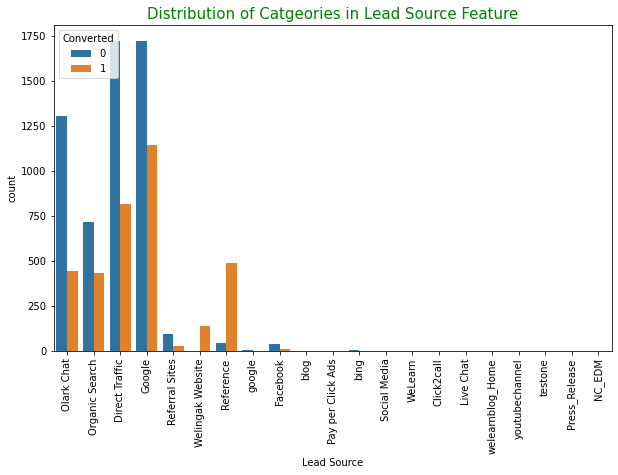

In [9]:
uni_anal('Lead Source',90)

## Insights:
- `Lead Source` tells us about the source of the lead from which lead has entered the details.
- When we consider the count of both converted and Non-Converted we could see the highest to lowest sources are in the following order: `Google`,`Direct Traffic`, `Ohark Chat`, `Organic Search` and few others.
- We could see lot of sources through which the lead source has been obtained. We need to handle the data since data is skewed with very less count for some of the sources.We need to handle this else we will have moree categories which can affect the model perfomance

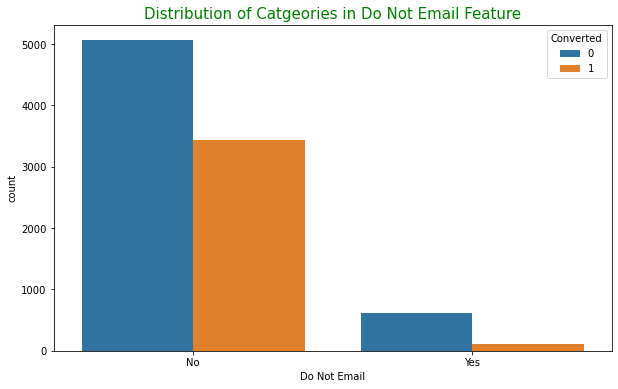

In [10]:
uni_anal('Do Not Email',0)

## Insights:
- `Do Not Email` tells about the lead intention that whether he/she want to be emailed about the course or not.
- We have only two categories here and the count of `NO` ismore when compared with the count of `YES` which tells us that the majority has selected `NO` indicates that there are high count of people intrested in receiving the mails about the course.

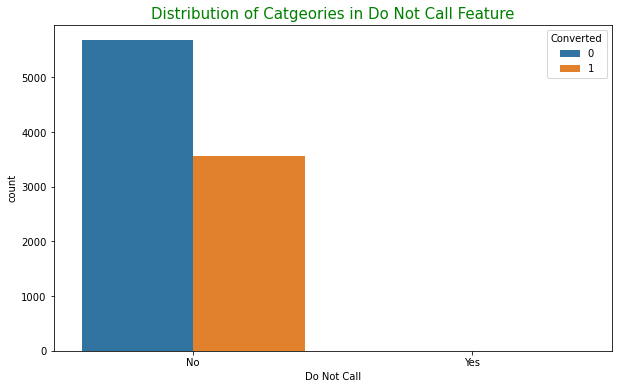

In [11]:
uni_anal('Do Not Call',0)

In [12]:
# Lets understadn the count of Yes category as well 
data['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

## Insights:
- `Do Not Call` tells about the lead intention that whether he/she want to be called about the course or not.
- We have only two categories here and the count of `NO` is more when compared with the count of `YES` which tells us that the majority has selected `NO` indicates that there are high count of people intrested in receiving the calls about the course.
- We can drop this column in further steps since the feature is saying the same information for all the rows and it will not make any difference since all the users intention is same

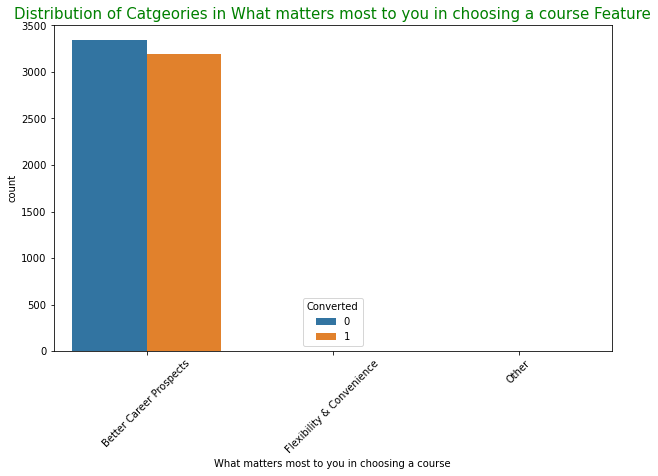

In [13]:
uni_anal('What matters most to you in choosing a course',45)

In [14]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

## Insights:
- `What matters most to you in choosing a course` tells about the customers main motto behind doing this course.
- We have only three categories here and the count of `Better Career Prospects` is more when compared with the count of other categories adn we could see the other category count is very less which is equal to 3.
- And lot of null values are already present in this feature.We can drop this column since it tells the same information for all the data points.

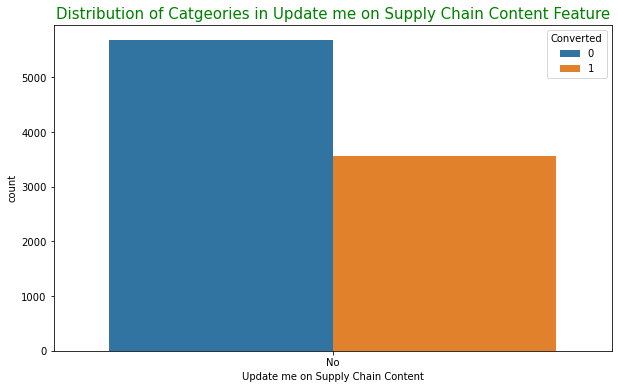

In [15]:
uni_anal('Update me on Supply Chain Content',0)

In [16]:
data['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

## Insights:
- `Update me on Supply Chain Content` tells about the intention of the customer to recieve updates on the Supply Chain Content.
- We have only one category here which is `NO` and we can drop this feature since this feature provide information to the entire data.SO we can ignore it

In [17]:
# Lets analyse the special category columns which Indicates whether the customer had seen the ad in any of the listed items and Through Recommendations features.
AdVisitedIn=['Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations']
AdVisitedIn

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

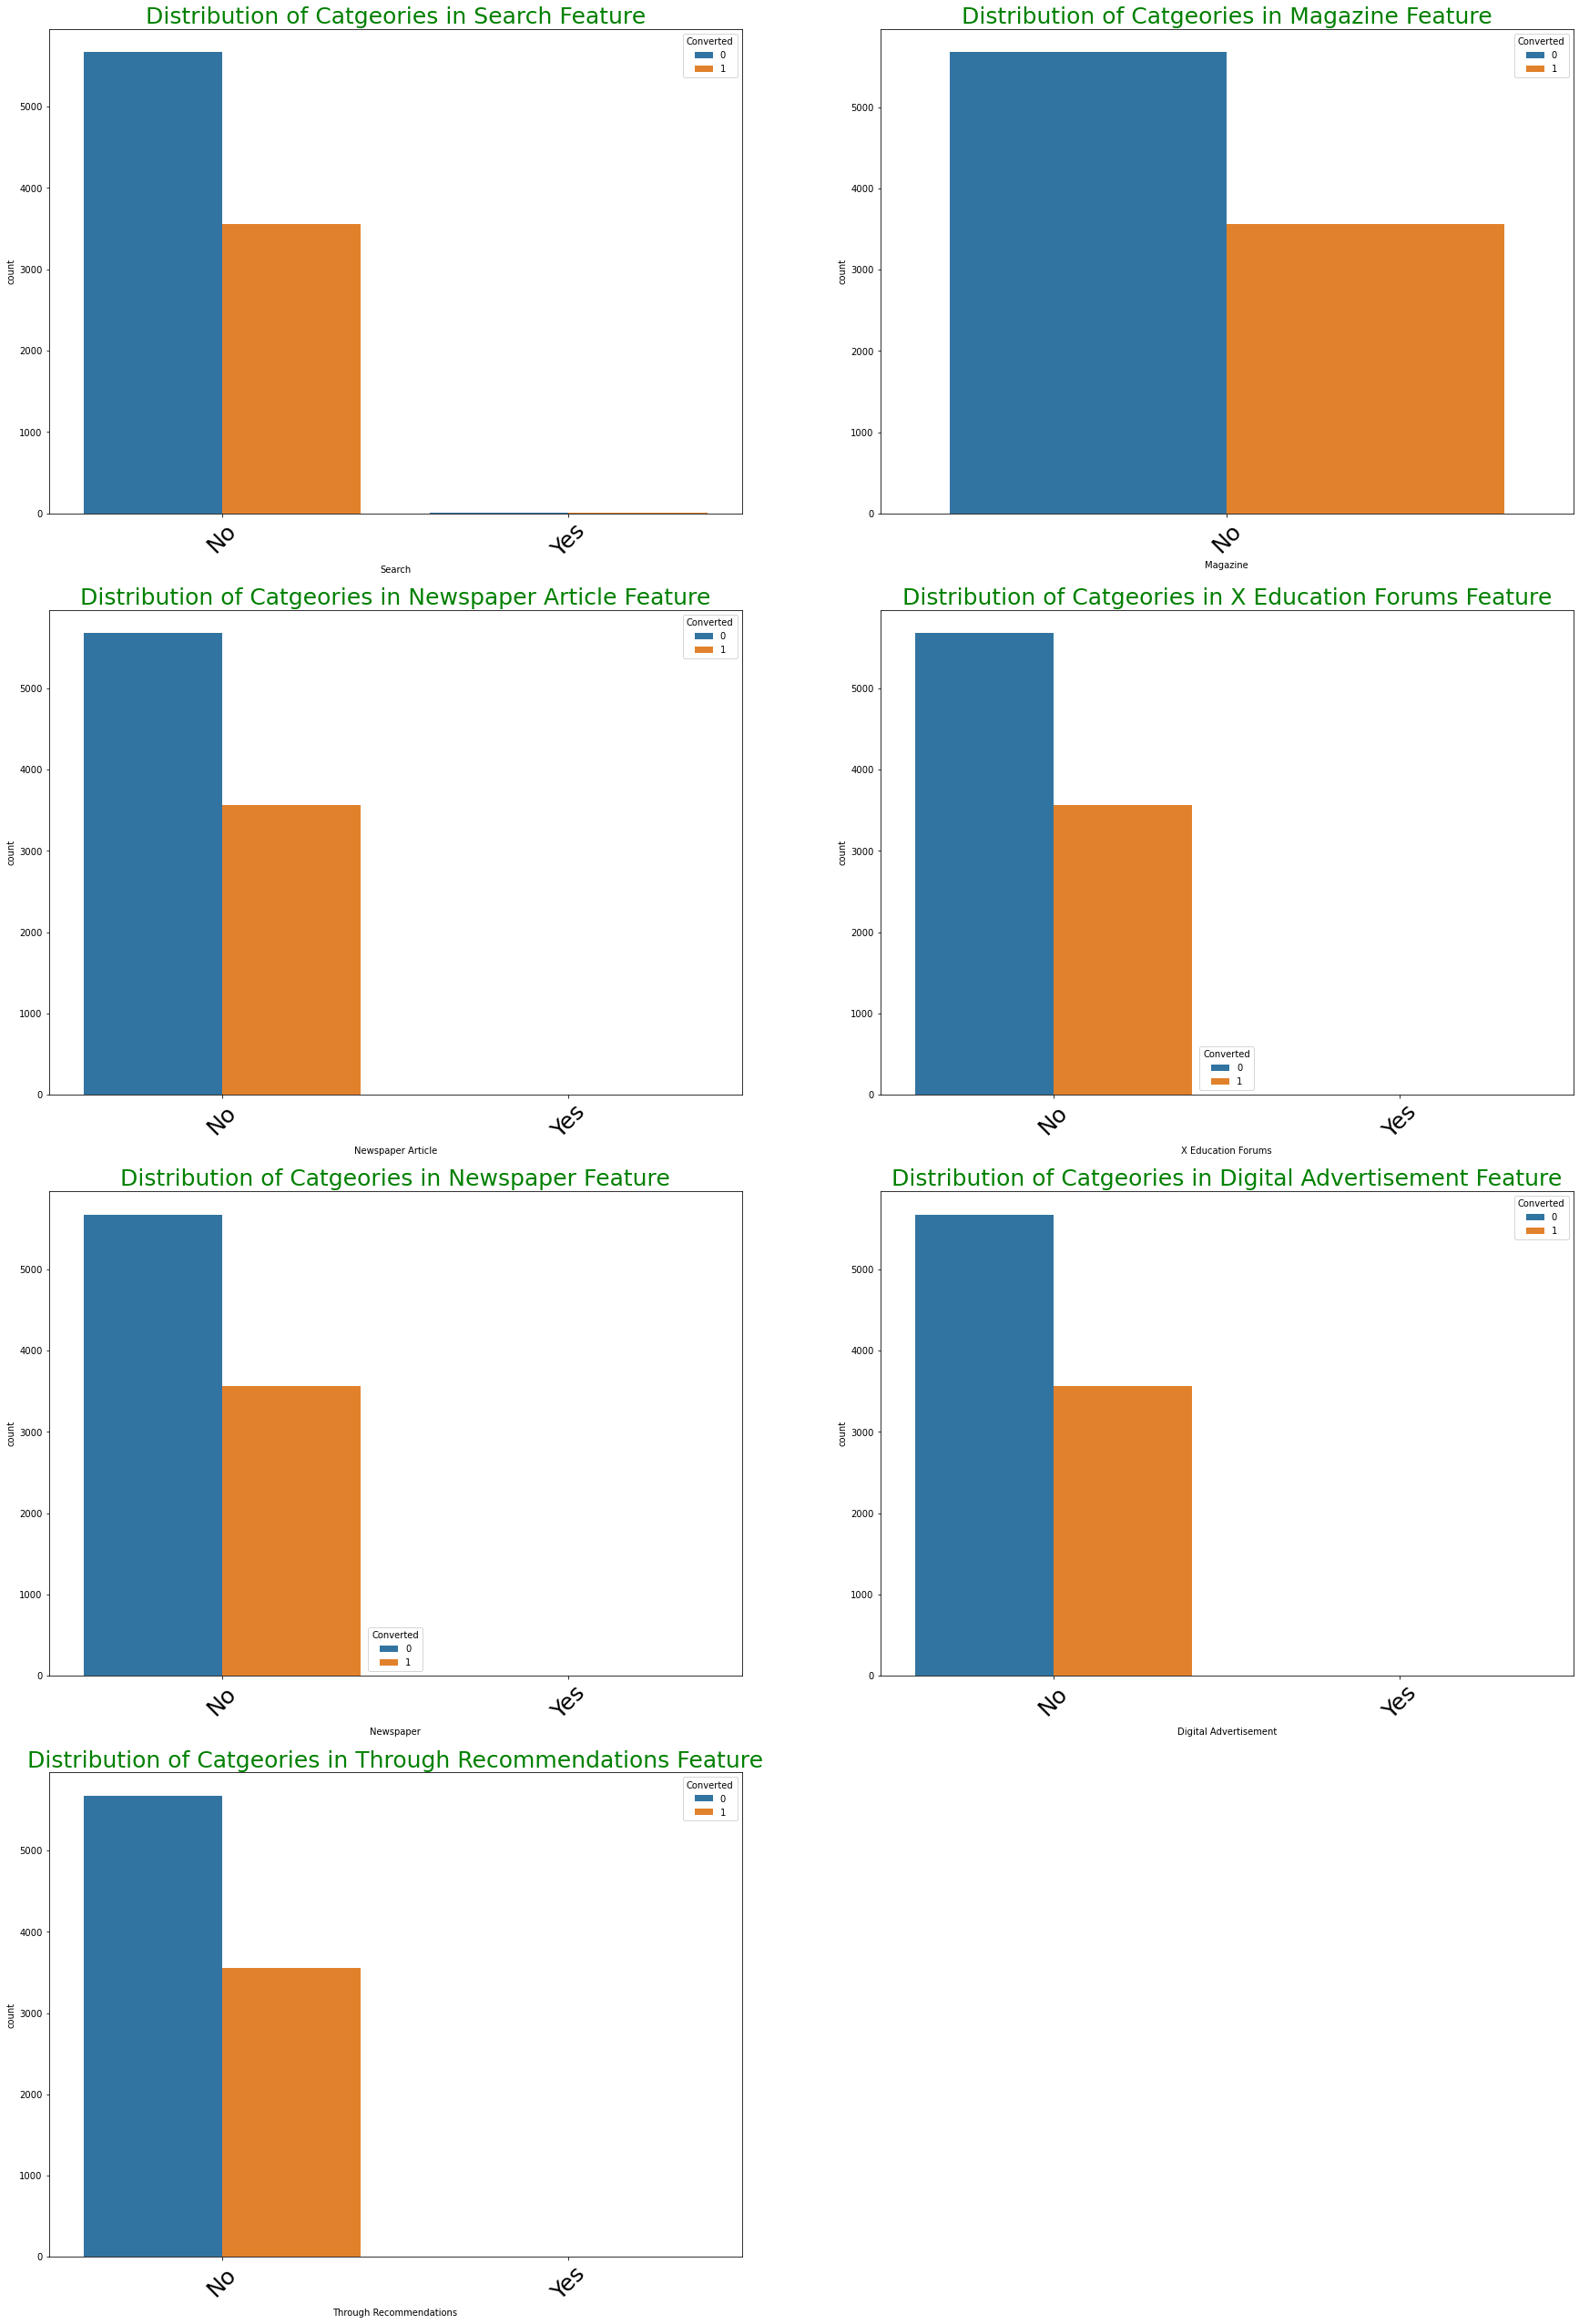

In [18]:
# Lets Visualise the spread of different categories
counter=range(1,len(AdVisitedIn)+1)
plt.figure(figsize=(30,45))
for i,j in zip(AdVisitedIn,counter):
    plt.subplot(4,2,j)
    plt.title('Distribution of Catgeories in '+ i+ ' Feature',size=25,color='Green')
    sns.countplot(x=i,hue='Converted',data=data)
    plt.xticks(rotation=45,size=25)
plt.show()

In [19]:
#Lets see the spread of categories in the above features
for i in AdVisitedIn:
    print(data[i].value_counts())
    print('---------------')

No     9226
Yes      14
Name: Search, dtype: int64
---------------
No    9240
Name: Magazine, dtype: int64
---------------
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
---------------
No     9239
Yes       1
Name: X Education Forums, dtype: int64
---------------
No     9239
Yes       1
Name: Newspaper, dtype: int64
---------------
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
---------------
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
---------------


## Insights:
- We could see that `Magazine` has only one category in it so we can drop this feature in further steps since it tells the same information to all the data points,Which can be ignore to increase model perfomance.
- We observed that the above features `Search`,`Newpaper Article`, `Education Forums`, `Newspaper`,`Digital Advertisment` and `Through Recommendations` is explaining two catgeories but the count of single catgeory is dominating heavily so we can drop these features in further steps,Since it tells the same information for all the data so we can ignore to increase perfomance.

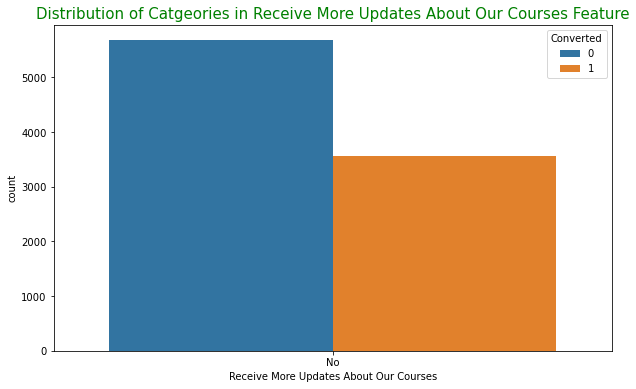

In [20]:
uni_anal('Receive More Updates About Our Courses',0)

## Insights:
- `Receive More Updates About Our Courses` tells about the customer who would like to receive more updates about the courses.
 - We have only one category here which is `NO` and we can drop this feature since this feature provide same information to the entire data.SO we can ignore it

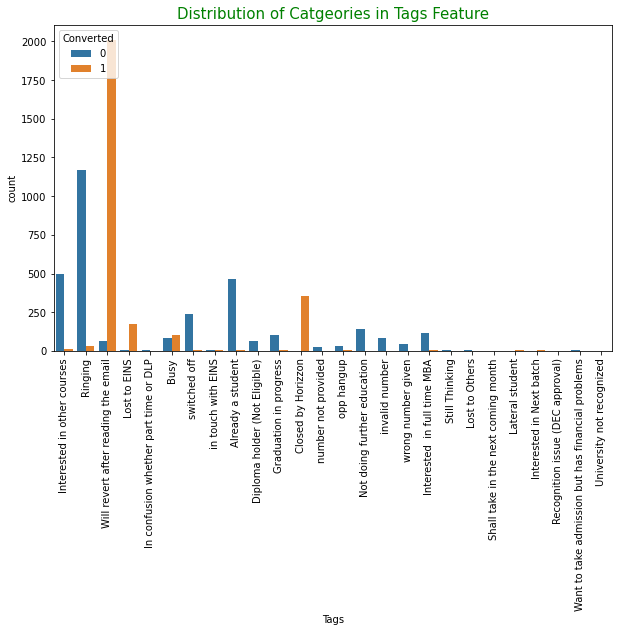

In [21]:
uni_anal('Tags',90)

## Insights:
- `Tags` indicates about the Tags assigned to customers indicating the current status of the lead.
- Actually this column is not filled by the user and marketing team might filled the details and this may not help in our anlysis.
- We have customers who has converted as Hot Lead when this `Tags` feature has this category:`Will revert adter reading the email` 

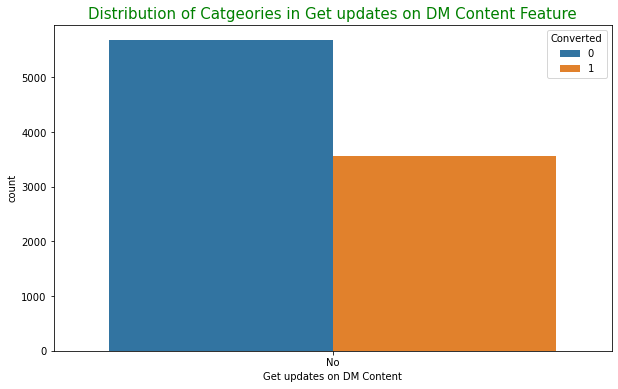

In [22]:
uni_anal('Get updates on DM Content',0)

## Insights:
- `Get updates on DM Content` tells about the customer who wish to get the updates on the DM Content.
 - We have only one category here which is `NO` and we can drop this feature since this feature provide same information to the entire data.So we can ignore it

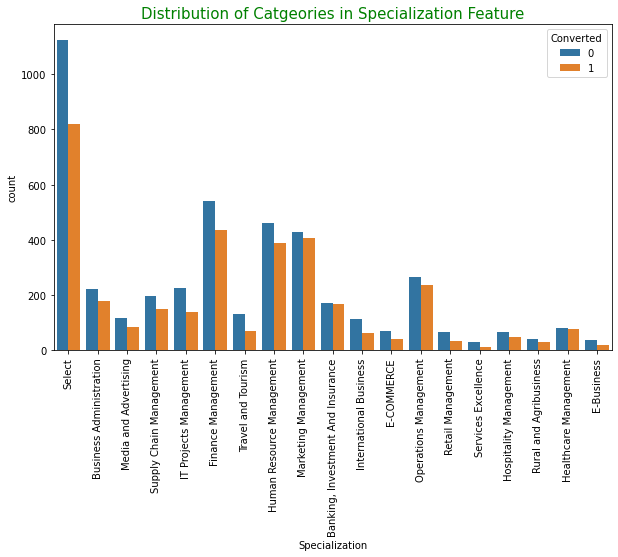

In [23]:
uni_anal('Specialization',90)

## Insights:
- `Specialization` tells about the industry domain in which the customer worked before.
- We have `Select` class at higher count so we need to treat this columns since user has not selected his/her option in this feature.
- `Finance Management`,`Marketing Management` and `Human Resource Management` are top three categories in this feature.


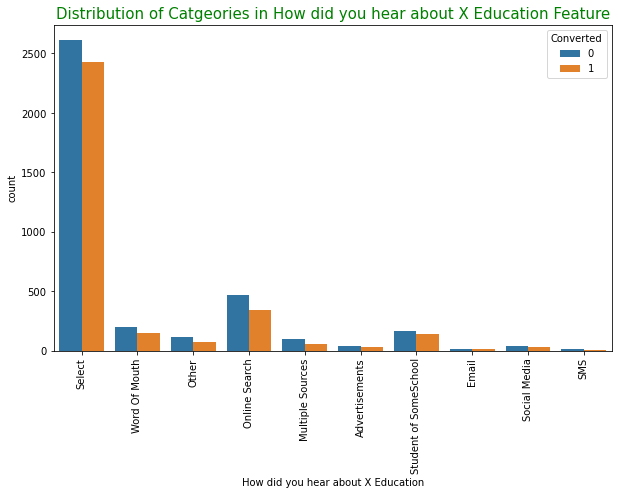

In [24]:
uni_anal('How did you hear about X Education',90)

## Insights:
- `How did you hear about X Education` tells about the source from which the customer heard about X Education.
- We have `Select` class at higher count so we need to treat this columns since user has not selected his/her option in this feature.
- `Online Search`,`Student of someschool` and `Word of mouth` are top three categories in this feature.


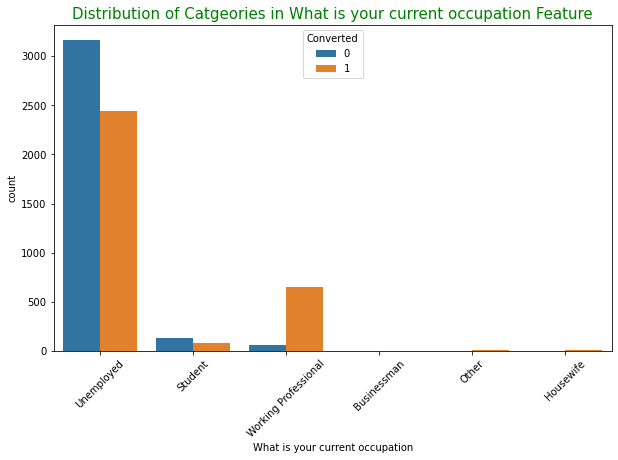

In [25]:
uni_anal('What is your current occupation',45)

## Insights:
- `What is your current occupation` tells about whether the customer is a student, umemployed or employed.
- We have `Unemployed` class at higher count.Followed by `Working professional and `Student`.we need to treat this columns since data is skewed because three categories consumes most of the data  in this feature we will treat to avoid skewness of the data 


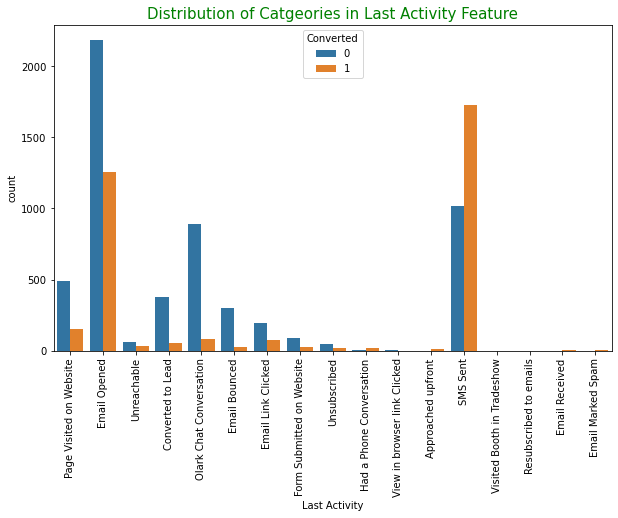

In [26]:
uni_anal('Last Activity',90)

## Insights:
- `Last Activity` tells about whether the Last activity performed by the customer. 
- We have the following order from highest to lowest occuring categories : `Email opened`, `Sms Sent` and `Olark Chat Converstaion` followed by many other categories.
- Data is skewed since we hae many categories but 3 categories occupies majority of the data. So we need to treat this feature since categories are skewed.

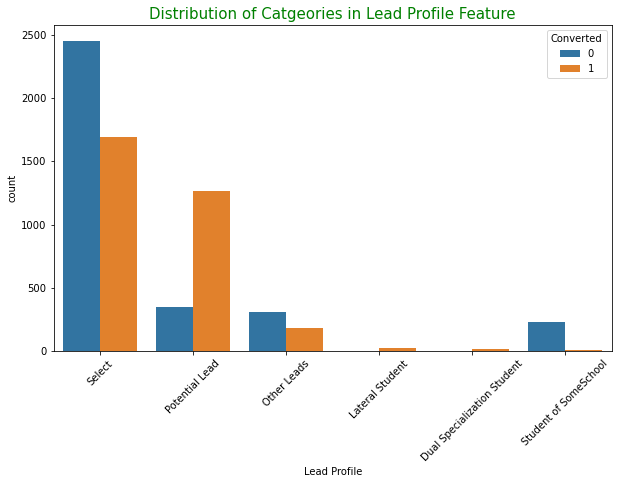

In [27]:
uni_anal('Lead Profile',45)

## Insights:
- `Lead Profile` tells about the lead level assigned to each customer based on their profile.
- We have multiple catgeories here indicating the highest to lowest appeared categories in the following order: `Potential Lead`, `Other Leads` and `Later Student`.
- We should treat this column since there is lot of skewness in the data because 3 columns count is very high when compared with all other catgeories.

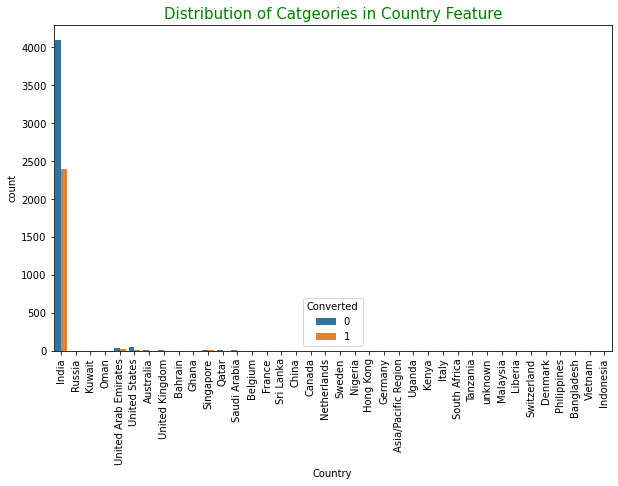

In [28]:
uni_anal('Country',90)

## Insights:
- `Country` tells about the country of the customer.
- We have multiple countrues to which the customers belongs to but India has high dominating values when compared with other counties.
- We should drop this column since there is lot of skewness in the data because only one columns count is very high when compared with all other catgeories.

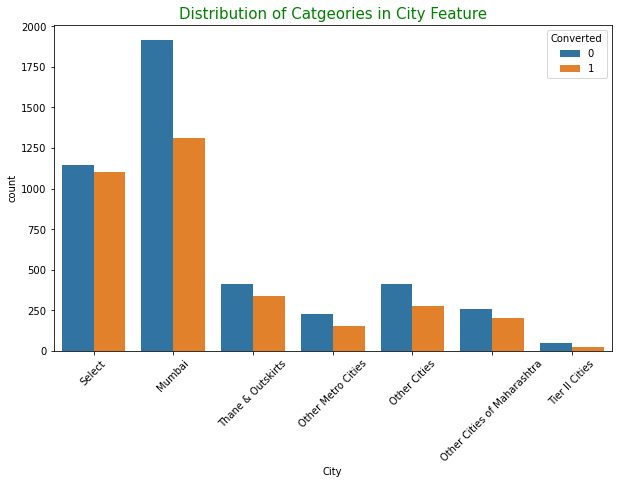

In [29]:
uni_anal('City',45)

## Insights:
- `City` feature tells about the city to which the city of the customer belongs to.
- We could see special category called `Select` it is appearing because the user has not selcted the city he/she belong to.We will treat this category in furthe steps.
- `Mumbai` has the higher count among the category.

In [30]:
## An index and score assigned to each customer based on their activity and their profile

score_Assigned=['Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score']
score_Assigned

['Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

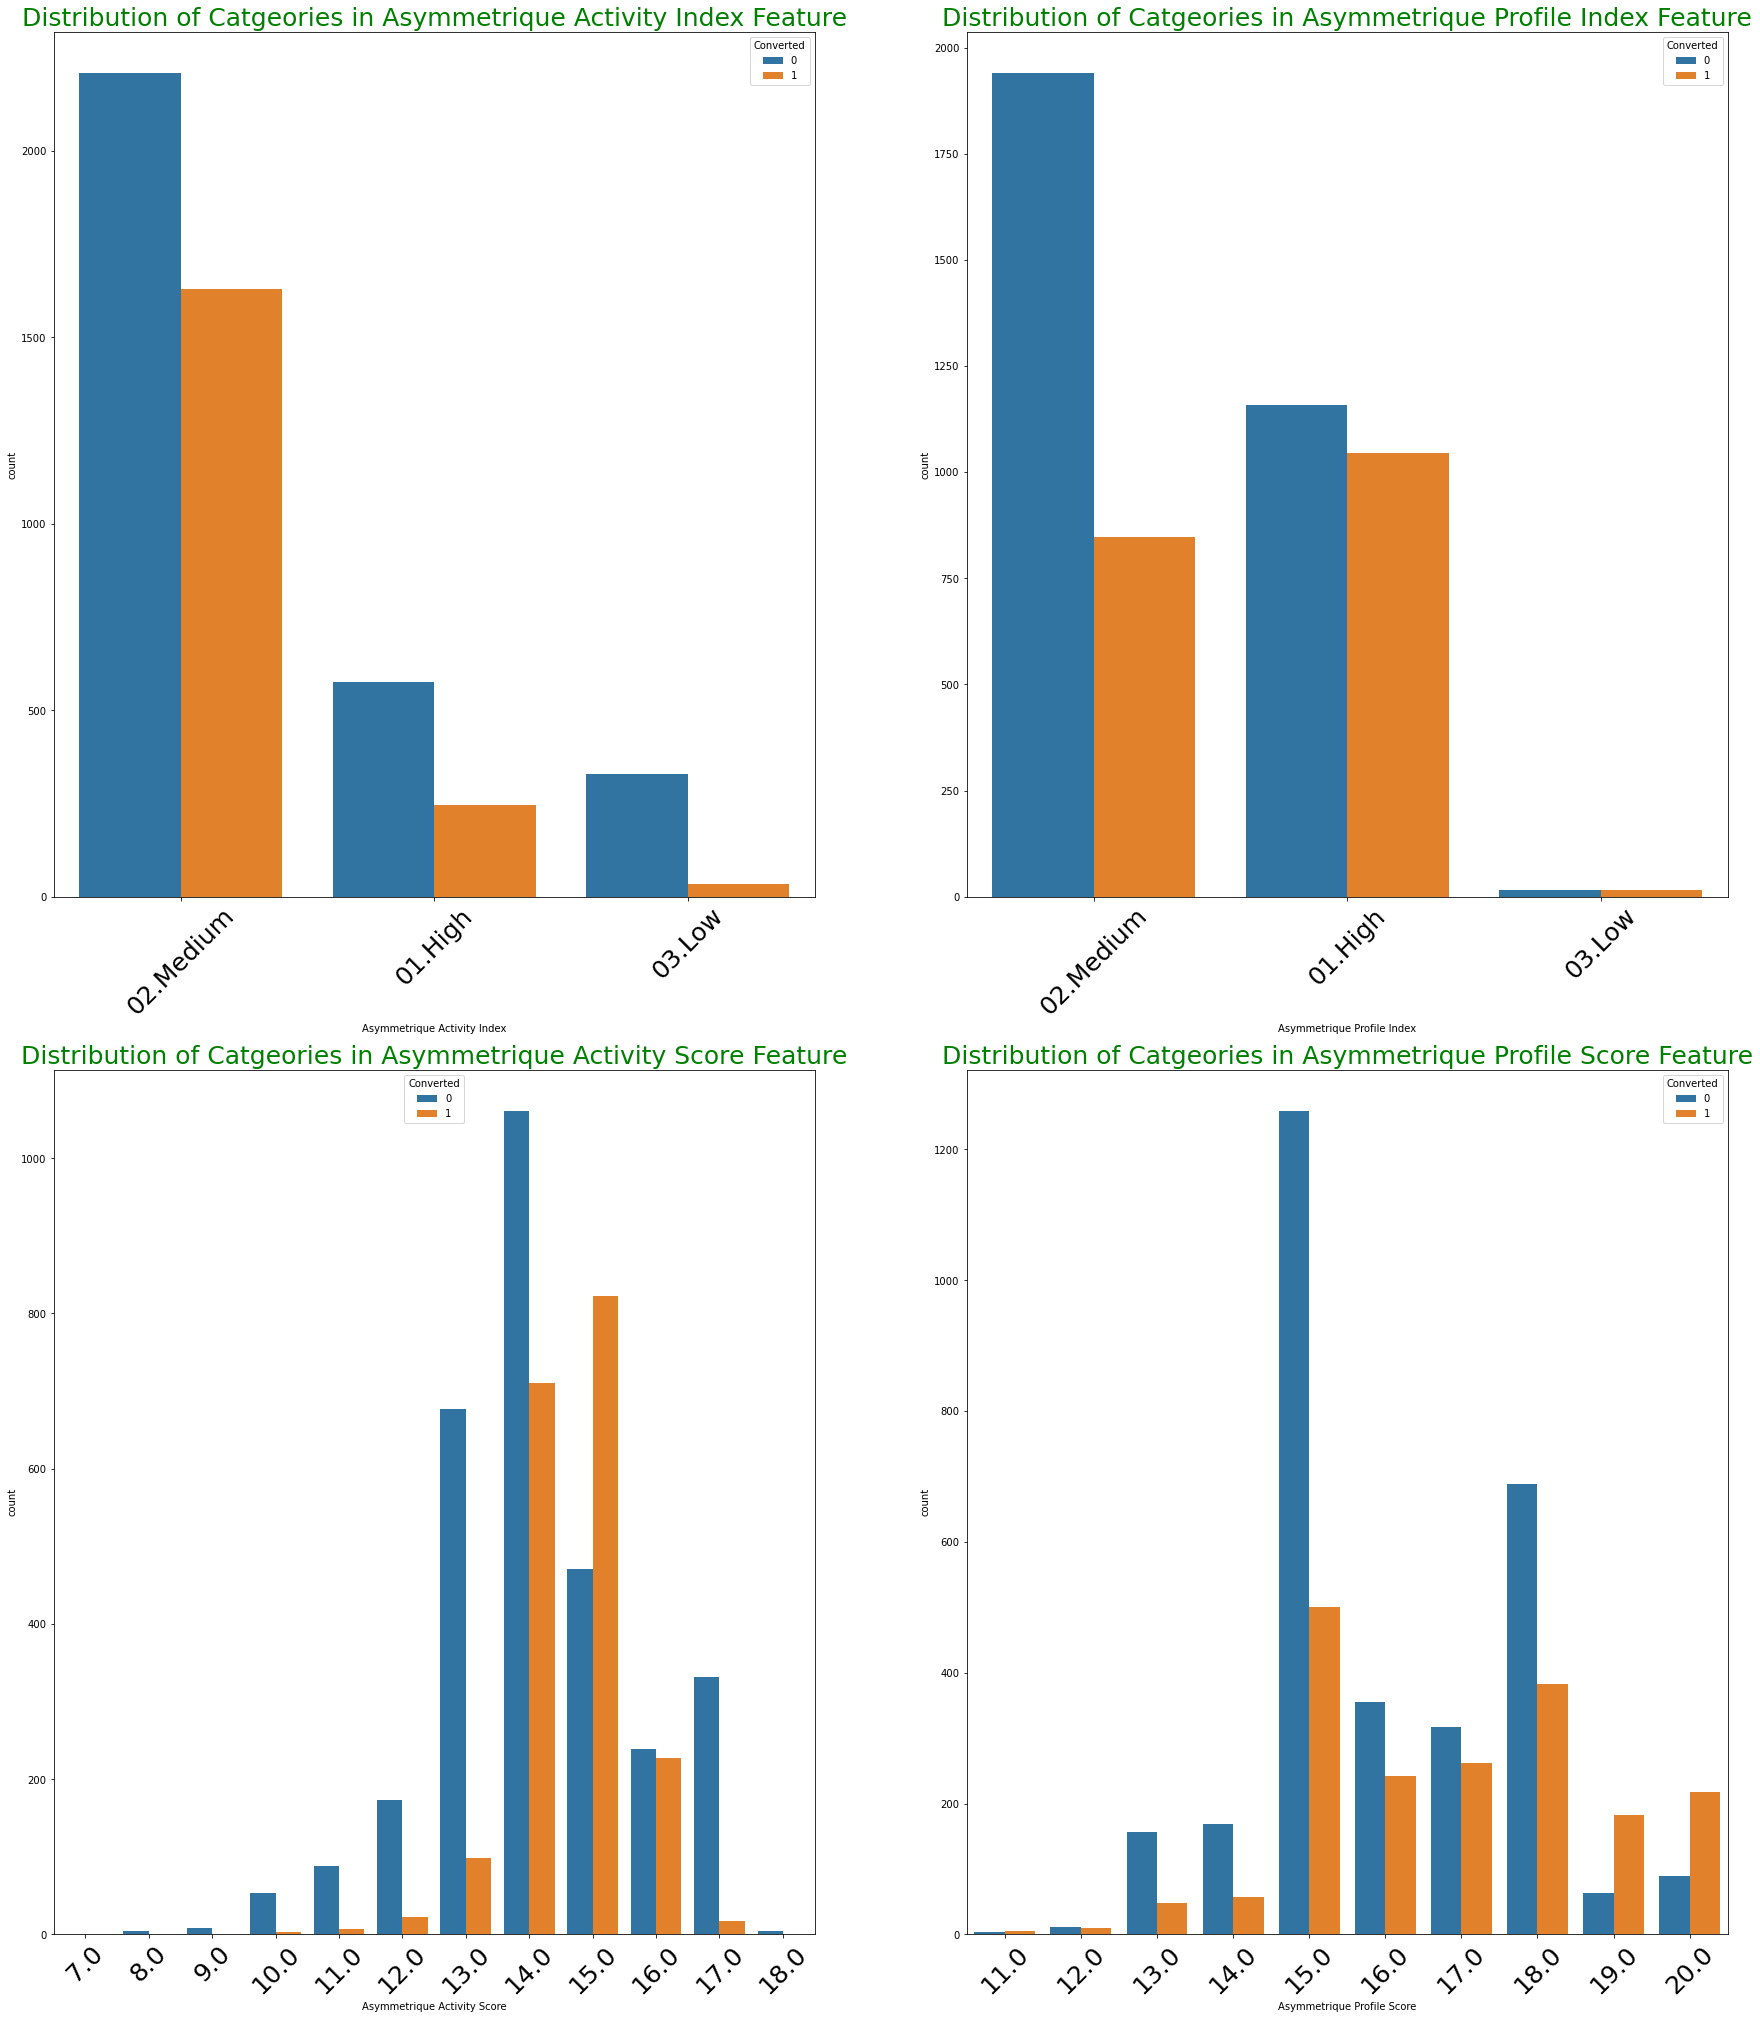

In [31]:
counter=range(1,len(score_Assigned)+1)
plt.figure(figsize=(30,35))
for i,j in zip(score_Assigned,counter):
    plt.subplot(2,2,j)
    plt.title('Distribution of Catgeories in '+ i+ ' Feature',size=25,color='Green')
    sns.countplot(x=i,hue='Converted',data=data)
    plt.xticks(rotation=45,size=25)
plt.show()

## Insights:
- We could see that `Asymmetrique Activity Index` and `Asymmetrique Profile Index` has similar behavior indicating highest to lowest order :Medium,High and Low.
- `Asymmetrique Activity Score` and `Asymmetrique Profile score` hs numerical data which we will consider further we could data is skewed in all the four features.

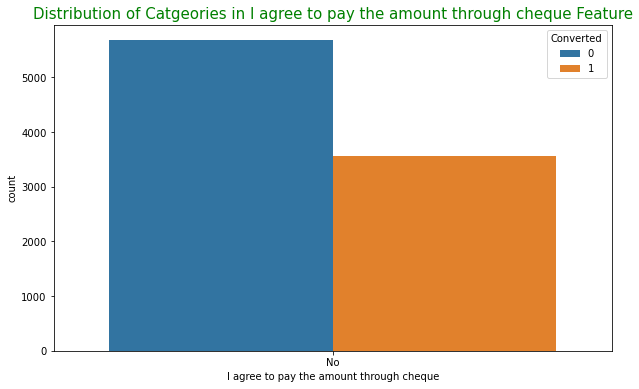

In [32]:
uni_anal('I agree to pay the amount through cheque',0)

## Insights:
- `I agree to pay the amount through cheque` tells about the customer who has agreed to pay the amount through cheque or not.
- We have only one category here which is `NO` and we can drop this feature since this feature provide same information to the entire data.So we can ignore it

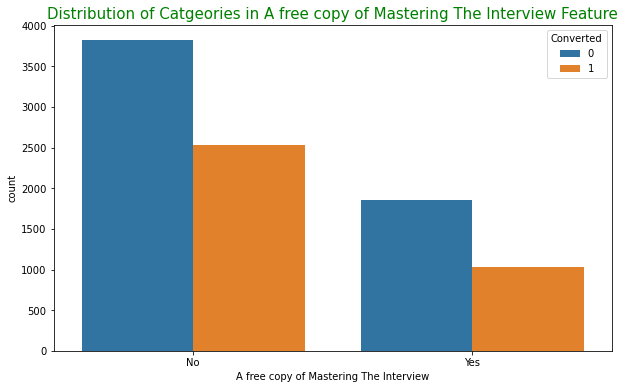

In [33]:
uni_anal('A free copy of Mastering The Interview',0)

## Insights:
- `A free copy of Mastering The Interview` tells about the Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
- We have only two categories here and the count of `NO` is more when compared with the count of `YES` which tells us that the majority has selected `NO` indicates that there are high count of people intrested in a free copy of `Mastering the Interview`

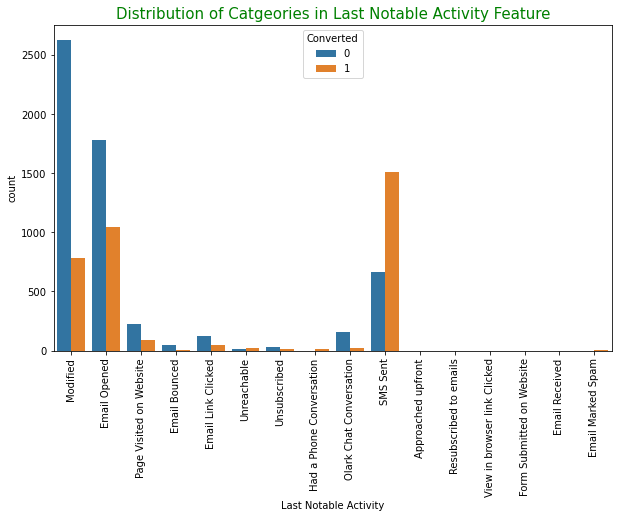

In [34]:
uni_anal('Last Notable Activity',90)

## Insights:
- `Last Notable Activity` tells about the last notable acitivity performed by the student.
- We have multiple catgeories here indicating the highest to lowest appeared categories in the following order: `Modified`, `Email Opened` and `Sms Sent`.
- We should treat this column since there is lot of skewness in the data because 3 columns count is very high when compared with all other catgeories.

## Numerical Data Analysis and Treatment

In [35]:
# Reuable method for univariate distribution for numerical features
def univ_dist(x):
    plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)    
    plt.title('Distribution of the '+x+' feature',color='Green',size=15)
    sns.distplot(data[x])
    plt.xlabel(x,color='red',size=12)    
    plt.ylabel('Density',color='red',size=12) 
    
    plt.subplot(1,2,2)    
    plt.title('Distribution of the percentile values for '+x+' feature',color='Green',size=15)
    sns.boxplot(data[x])
    plt.xlabel(x,color='red',size=12) 
plt.show()

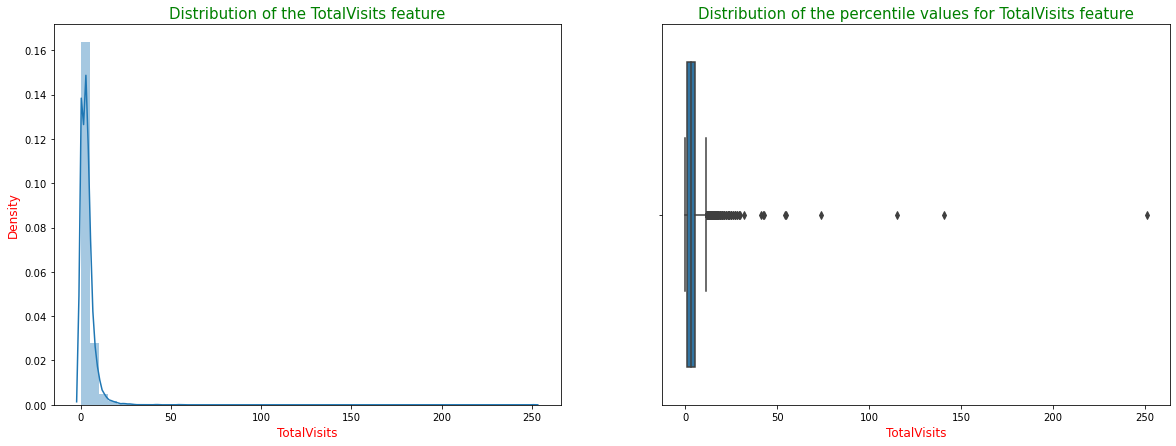

In [36]:
# Lets see the distribution of TotalVisits feature
univ_dist('TotalVisits')

## Insights:
- `TotalVisits` feature is right skewed lets see the percentile values and treat this feature.
- We will treat this column so that skewness will not affect the model

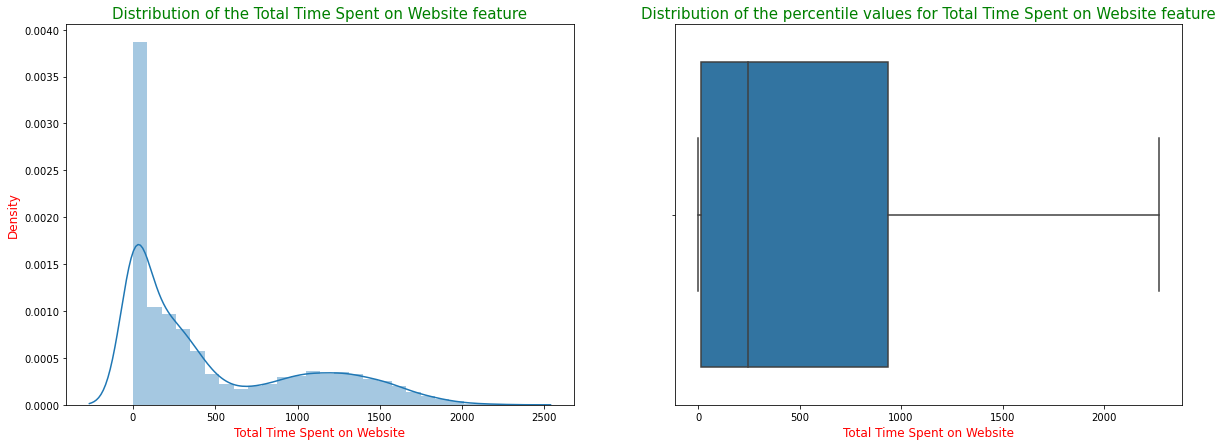

In [37]:
univ_dist('Total Time Spent on Website')

## Insights:
- `Total Time Spent on Website` feature is right skewed lets see the percentile values and treat this feature.
- We will treat this column so that skewness will not affect the model

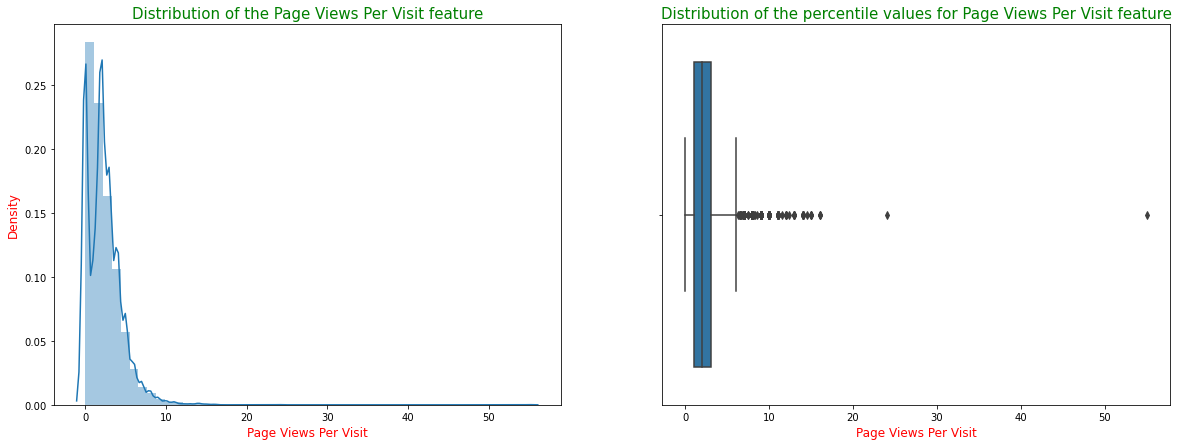

In [38]:
univ_dist('Page Views Per Visit')

## Insights:
- `Page views per visit` feature is right skewed lets see the percentile values and treat this feature.
- We will treat this column so that skewness will not affect the model

## Lets treat the Numerical features and applying capping for outlier treatment if required

In [39]:
# Lets consider these features and store them in the split1 list
split1=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
len_split1=len(split1)

print('Percentile values before capping the outliers\n')
for i,j in zip(split1,range(len_split1)):
    print('Percentile values before capping the outliers for '+ i +' is :\n', data[i].quantile([0,0.05,0.1,0.9,0.95,0.99,1]))
    print()

Percentile values before capping the outliers

Percentile values before capping the outliers for TotalVisits is :
 0.00      0.0
0.05      0.0
0.10      0.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

Percentile values before capping the outliers for Total Time Spent on Website is :
 0.00       0.00
0.05       0.00
0.10       0.00
0.90    1380.00
0.95    1562.00
0.99    1840.61
1.00    2272.00
Name: Total Time Spent on Website, dtype: float64

Percentile values before capping the outliers for Page Views Per Visit is :
 0.00     0.0
0.05     0.0
0.10     0.0
0.90     5.0
0.95     6.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64



## Insights:
- we could see that all the feature `TotalVisits`,` total time spent on website` and `Page views per visit` has huge difference between 99th and 100th perentile values.
- Due to this data is skewed we need to treat them so that skewness will be reduced.lets cap the outliers in the next step.

### Outlier Treatment using Capping technique

In [40]:
# Lets consider these features and store them in the split1 list
split1=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
len_split1=len(split1)

for i,j in zip(split1,range(len_split1)):
    percentilevalues = data[i].quantile([0.05,0.99]).values
    data[i] = np.clip(data[i], percentilevalues[0], percentilevalues[1])  # Replace the original features after capping the data in the original dataframe 
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0.0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674.0,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428.0,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Insights:
- As shown above we have capped the data at 5th and 99th percentile for the following features: `TotalVisits`,` total time spent on website` and `Page views per visit` has huge difference between 99th and 100th perentile values.
- Due to this data skewness will be reduced.

### Lets verify the percentile values after capping the outliers

In [41]:
split1=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
len_split1=len(split1)

print('Percentile values After capping the outliers\n')
for i,j in zip(split1,range(len_split1)):
    print('percentile values After applying capping for '+ i +' is :\n', data[i].quantile([0,0.05,0.1,0.9,0.95,0.99,1]))
    print()

Percentile values After capping the outliers

percentile values After applying capping for TotalVisits is :
 0.00     0.0
0.05     0.0
0.10     0.0
0.90     7.0
0.95    10.0
0.99    17.0
1.00    17.0
Name: TotalVisits, dtype: float64

percentile values After applying capping for Total Time Spent on Website is :
 0.00       0.0000
0.05       0.0000
0.10       0.0000
0.90    1380.0000
0.95    1562.0000
0.99    1840.3721
1.00    1840.6100
Name: Total Time Spent on Website, dtype: float64

percentile values After applying capping for Page Views Per Visit is :
 0.00    0.0
0.05    0.0
0.10    0.0
0.90    5.0
0.95    6.0
0.99    9.0
1.00    9.0
Name: Page Views Per Visit, dtype: float64



## Insights:
- As shown above we have capped the data at 5th and 99th percentile for the following features: `TotalVisits`,` total time spent on website` and `Page views per visit` has huge difference between 99th and 100th perentile values.
- Due to this data skewness will be reduced.

## 4.Data/Feature Validation

In [42]:
## Drop prospect id and Lead Number since  its random number assigned to lead and doesnt look meaningful in the model
data.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)
data.shape

(9240, 35)

### Lets consider categorical columns. we will drop column which have same value for  all the rows since it will not make difference in the outcome or prediction

In [43]:
## Display the single category features
single_category=[]
for i in data.columns:
    if(len(data[i].value_counts().index)==1):
        single_category.append(i)
print("\n The count of single category columns is {0}  \n Feature/Column names are:".format(len(single_category)))
print(single_category)


 The count of single category columns is 5  
 Feature/Column names are:
['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


## Insights:
- As observed we have 5 features in which we have single catgeiry present in the data we can drop this feature. Since it will not make difference in the outcome considering this may affect the model's perfomance.

In [44]:
## Display the multiple category features
multiple_category=[]
for i in data.columns:
    if(len(data[i].value_counts().index)>1):
        multiple_category.append(i)
print("\n The count of multiple category is {0} \n Feature/colum names are:".format(len(multiple_category)))
print(multiple_category)


 The count of multiple category is 30 
 Feature/colum names are:
['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'A free copy of Mastering The Interview', 'Last Notable Activity']


## Insights:
- We have 30 features after the basice data validation lets look for further anlysis steps to treat the data

In [45]:
# Drop the single catgeory columns
data.drop(single_category,inplace=True,axis=1)

In [46]:
# Verify the shape after dropping the columns in theprevious step
data.shape

(9240, 30)

## Insights:
- We dropped the single catgeory columns in the above step

### Treat the Advertised catgeory columns 

In [47]:
Advertisedcolumns=['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement']
Advertisedcolumns

['Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement']

In [48]:
for i in Advertisedcolumns:
    print(data[i].value_counts())

No     9226
Yes      14
Name: Search, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


## Insights:
- We already discussed the above category and it can affect the model perfomance since all the features are giving the smae information or biased towards a single category so lets drop them

In [49]:
biasedcolumns=['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement']

In [50]:
data.shape

(9240, 30)

In [51]:
data.drop(biasedcolumns,axis=1,inplace=True)
data.shape

(9240, 25)

## Insights:
` We have dropped the 5 columns which was not worth considering for further analysis

## Null value check

In [52]:
#percentage of null values
percentageofnullvalues=round(data.isnull().sum()/data.shape[0]*100,2)
percentageofnullvalues

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Through Recommendations                           0.00
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City      

## Null value Treatment

# Drop null values where percentage of null values is more than 30 percent

In [53]:
#drop 'Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'
# dropping columns having null value percentage is gretare than 30 percent

data.drop(['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)
data.shape

(9240, 19)

## Observation:
- We have dropped features where null value percentage is more than 30 percent

In [54]:
# Lets verify the null value percentage again and treat them
percentageofnullvalues=round(data.isnull().sum()/data.shape[0]*100,2)
percentageofnullvalues

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Through Recommendations                           0.00
Lead Profile                                     29.32
City                                             15.37
A free copy of Mastering The Interview            0.00
Last Notab

### Lets treat other features as well where we have null values

In [55]:
# Lets treat missing value of Lead Source column and replace with maximum catgeory occured
data['Lead Source'].replace(np.NaN,data['Lead Source'].mode()[0],inplace=True)

In [56]:
# Missing value of Total Visits is repplace with median value 
data['TotalVisits'].replace(np.NaN,data['TotalVisits'].median(),inplace=True)

In [57]:
# Missing value of 'Page Views Per Visit' is repplaced with median value 
data['Page Views Per Visit'].replace(np.NaN,data['Page Views Per Visit'].median(),inplace=True)

In [58]:
# Replace nan with most appeared category so use mode
data['Last Activity'].replace(np.NaN,data['Last Activity'].mode()[0],inplace=True)

### Lets understand the distribution and skewness of the Lead Source data which we observed in visualization and treat them

In [59]:
# Value counts of different catgeoris in Lead source feature
data['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
youtubechannel          1
blog                    1
WeLearn                 1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [60]:
# Method which helps in replacing the values in Lead source column
def leadsource(x):
    if(x == 'Google'):
        return 'Google'
    elif x=='Direct Traffic':
        return 'Direct Traffic'
    elif x=='Olark Chat':
        return 'Olark Chat'
    elif x=='Organic Search':
        return 'Organic Search'
    elif x=='Reference':
        return 'Reference'
    elif x=='Welingak Website':
        return 'Welingak Website'
    elif x=='Referral Sites':
        return 'Referral Sites'
    else:
        return 'Others'

In [61]:
# Treat the skewed data for Lead source column
data['Lead Source']=data['Lead Source'].apply(leadsource)

In [62]:
# Verify the value counts to check that the skewness has been removed
data['Lead Source'].value_counts()

Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                83
Name: Lead Source, dtype: int64

In [63]:
#verify the null value percentage
percentageofnullvalues=round(data.isnull().sum()/data.shape[0]*100,2)
percentageofnullvalues

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Through Recommendations                           0.00
Lead Profile                                     29.32
City                                             15.37
A free copy of Mastering The Interview            0.00
Last Notab

In [64]:
# Drop country and city column.
data.drop(['Country','City'],axis=1,inplace=True)

## Insights and Observations:
- We have dropped country column since we observed in visualisation where majority of the rows has country as india and eventhough we try to replace  26 percent of null values with mode/Highest occuring value this percentage will increase.so its better not to consider this feature in our analysis.
- We have dropped city column since city column has huge number of `select` category and has less infomration and may not be useful for our analysis.

In [65]:
data.shape

(9240, 17)

In [66]:
# Lets verify the value_counts of multiple features
for i in data:
    print(data[i].value_counts())
    print('----------------------')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------
Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                83
Name: Lead Source, dtype: int64
----------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
----------------------
No     9238
Yes       2
Name: Do Not Call, dtype: int64
----------------------
0    5679
1    3561
Name: Converted, dtype: int64
----------------------
0.0     2189
2.0     1680
3.0     1443
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
17.0      99
11.0      86
13.0      48
12.0      45
14.0      36
16.0      21
15.0      18
Name: TotalVisits, dtype: int64
----------------------
0.00     


### As observed following features have `select` category : Specialization,How did you hear about X Education, Lead Profile. Lets treat this category since the user didn't fill the details in this category may be due to multiple reasons like user is not applicable to this category or he dont want to disclose details,Lets replace Slect category with nan Values

In [67]:
# Replace select category with nan values
data['Specialization'].replace('Select',np.NaN,inplace=True)
data['How did you hear about X Education'].replace('Select',np.NaN,inplace=True)
data['Lead Profile'].replace('Select',np.NaN,inplace=True)

In [68]:
## Lets verify the nan value count again
percentageofnullvalues=round(data.isnull().sum()/data.shape[0]*100,2)
percentageofnullvalues

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Through Recommendations                           0.00
Lead Profile                                     74.19
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

## Drop Features where null value percentage is more than 30 percent

In [69]:
# newfeatures holds column names where column has less than 30 percent null values
newfeatures=percentageofnullvalues[percentageofnullvalues<30].index
newfeatures

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [71]:
# conider new features after dropping columns where null value count is more
data=data[newfeatures]
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0.0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674.0,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,Email Opened,Student,Better Career Prospects,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,Unreachable,Unemployed,Better Career Prospects,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428.0,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,No,Modified


In [72]:
## Lets verify the nan value count again

percentageofnullvalues=round(data.isnull().sum()/data.shape[0]*100,2)
percentageofnullvalues

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Through Recommendations                           0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

In [73]:
for i in data:
    print(data[i].value_counts())
    print('--------------')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
--------------
Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                83
Name: Lead Source, dtype: int64
--------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
--------------
No     9238
Yes       2
Name: Do Not Call, dtype: int64
--------------
0    5679
1    3561
Name: Converted, dtype: int64
--------------
0.0     2189
2.0     1680
3.0     1443
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
17.0      99
11.0      86
13.0      48
12.0      45
14.0      36
16.0      21
15.0      18
Name: TotalVisits, dtype: int64
--------------
0.00       2193
1840.61      93
60.00        19
74.00    

In [74]:
## Lets verify the nan value count again

percentageofnullvalues=round(data.isnull().sum()/data.shape[0]*100,2)
percentageofnullvalues

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Through Recommendations                           0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

# Lets consider Analysis on `What matters most to you in choosing a course`

In [75]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

## Insights:
- In the above step we saw that `What matters most to you in choosing a course` has only one category which is highly dominating other two categories which are jsut 3 in number so its better to drop since the count of other category is very less to consider in model
- Anyhow we can drop this column since the feature is saying same indformation to all the users

In [76]:
data.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [77]:
## Lets verify the nan value count again

percentageofnullvalues=round(data.isnull().sum()/data.shape[0]*100,2)
percentageofnullvalues

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
What is your current occupation           29.11
Through Recommendations                    0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

### Lets treat `What is your current occupation` feature since we observed the feature is skewed in visualization lets treat this featre

In [78]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [79]:
# Method helps in replacing the unnecessary categories to avoid skewness
def occupation(x):
    if x=='Unemployed':
        return 'Unemployed'
    elif x=='Working Professional':
        return 'Working Professional'    
    else:
        return 'Others'

In [80]:
data['What is your current occupation']=data['What is your current occupation'].apply(occupation)

In [81]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Others                  2934
Working Professional     706
Name: What is your current occupation, dtype: int64

## Insights:
- As observed the Categorical skewness has been reduced.

In [82]:
## Lets verify the nan value count again

percentageofnullvalues=round(data.isnull().sum()/data.shape[0]*100,2)
percentageofnullvalues

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## Insights:
- We are good with data cleaning lets go ahead and fit the model and perform the statistical analysis on the data

In [83]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0.0,0.0,Page Visited on Website,Unemployed,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674.0,2.5,Email Opened,Unemployed,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,Email Opened,Others,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,Unreachable,Unemployed,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428.0,1.0,Converted to Lead,Unemployed,No,No,Modified


## Lets split the feature names where we have null values and non null values

In [84]:
nonnullvalues=[]
nullvalues=[]
for i in data:
    if(data[i].isnull().sum()==0):
        nonnullvalues.append(i) 
    else:
        nullvalues.append(i)
print(nonnullvalues)
print(len(nonnullvalues))

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'What is your current occupation', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity']
13


In [85]:
print(nullvalues)
print(len(nullvalues))

[]
0


## Insights:
- As shown in te above steps we just splitted the data into `nullvalues` and `nonnullvalues`.
- we dont have any `nullvalues` in the data. Lets build the model 

In [86]:
# considering non -null values 
data=data[nonnullvalues]
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0.0,0.0,Page Visited on Website,Unemployed,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674.0,2.5,Email Opened,Unemployed,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,Email Opened,Others,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,Unreachable,Unemployed,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428.0,1.0,Converted to Lead,Unemployed,No,No,Modified


In [87]:
#  Add the target column to variable y
y=data['Converted']
y=y.astype('int')
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int32

In [88]:
#Input features are passed into x variable
x=data.drop('Converted',axis=1)
x

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0.0,0.00,0.00,Page Visited on Website,Unemployed,No,No,Modified
1,API,Organic Search,No,No,5.0,674.00,2.50,Email Opened,Unemployed,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,2.0,1532.00,2.00,Email Opened,Others,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,1.0,305.00,1.00,Unreachable,Unemployed,No,No,Modified
4,Landing Page Submission,Google,No,No,2.0,1428.00,1.00,Converted to Lead,Unemployed,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,8.0,1840.61,2.67,Email Marked Spam,Unemployed,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,2.0,238.00,2.00,SMS Sent,Unemployed,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,2.0,199.00,2.00,SMS Sent,Unemployed,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,3.0,499.00,3.00,SMS Sent,Others,No,No,SMS Sent


### Lets treat categorical and noncategorical seperately then we will combine both of the dataframes using concat

In [89]:
#non categorical features
split1=data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
split1

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.0,0.00,0.00
1,5.0,674.00,2.50
2,2.0,1532.00,2.00
3,1.0,305.00,1.00
4,2.0,1428.00,1.00
...,...,...,...
9235,8.0,1840.61,2.67
9236,2.0,238.00,2.00
9237,2.0,199.00,2.00
9238,3.0,499.00,3.00


In [90]:
# Scale the data of split1
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mm=MinMaxScaler()
sc=StandardScaler()

In [91]:
split1=pd.DataFrame(mm.fit_transform(split1),columns=split1.columns)
split1

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.000000,0.000000,0.000000
1,0.294118,0.366183,0.277778
2,0.117647,0.832333,0.222222
3,0.058824,0.165706,0.111111
4,0.117647,0.775830,0.111111
...,...,...,...
9235,0.470588,1.000000,0.296667
9236,0.117647,0.129305,0.222222
9237,0.117647,0.108116,0.222222
9238,0.176471,0.271106,0.333333


 ## Insights:
    - In the previous step we have applied minmax scaling on the split1 dataframe

In [92]:
# categorical columns as different dataframe
split2=x.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'],axis=1)
split2

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,What is your current occupation,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,Unemployed,No,No,Modified
1,API,Organic Search,No,No,Email Opened,Unemployed,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,Others,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,Unemployed,No,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,Unemployed,No,No,Modified
...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,Email Marked Spam,Unemployed,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,SMS Sent,Unemployed,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,SMS Sent,Unemployed,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,SMS Sent,Others,No,No,SMS Sent


## Insights:
- we are conisdering the categorical data into split2 variable

### Apply get_dummies on categorical data

In [93]:
# Applying get dummies on the categorical data
split2=pd.get_dummies(split2,drop_first=True)
split2

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [94]:
#concat the split1 and split2 which hold the categorical data nd integer data and stire in x2 variable
x2=pd.concat([split1,split2],axis=1)
x2

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0.294118,0.366183,0.277778,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.117647,0.832333,0.222222,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.058824,0.165706,0.111111,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.117647,0.775830,0.111111,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0.470588,1.000000,0.296667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0.117647,0.129305,0.222222,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0.117647,0.108116,0.222222,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,0.176471,0.271106,0.333333,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [95]:
x2.shape

(9240, 51)

## Insights:
- As shown above get_dummies has been applied on the data and minmax scaling has been done and input is stored in x2 and output/Target is stored in y

## Apply Logistic Regression on the data

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [97]:
lr=LogisticRegression()

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x2,y,random_state=42)

In [99]:
# Fit the model on the training data
lr.fit(x_train,y_train)

LogisticRegression()

In [100]:
# store the predicted value on test data into y_pred
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [101]:
# Look at the confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1246,  158],
       [ 232,  674]], dtype=int64)

In [102]:
# Look at classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1404
           1       0.81      0.74      0.78       906

    accuracy                           0.83      2310
   macro avg       0.83      0.82      0.82      2310
weighted avg       0.83      0.83      0.83      2310



In [103]:
print(accuracy_score(y_test,y_pred))

0.8311688311688312


## Insights:
- We have Accuracy at 0.83.
- Lets do statitistical analysis and remove the statistical insignificance features in any then we will see the metrics called precision and recall

## Statistical significance Analysis

In [104]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
# import Recursive feature elimination 
from sklearn.feature_selection import RFE
rfe=RFE(lr,15)
rfe=rfe.fit(x_train,y_train)

In [106]:
# support for all the features were given here
rfe.support_

array([ True,  True,  True, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False,  True,  True, False])

In [107]:
# Print the column names,Suppport and ranking 
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Origin_Quick Add Form', False, 10),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Others', False, 16),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 26),
 ('Last Activity_Converted to Lead', False, 9),
 ('Last Activity_Email Bounced', False, 12),
 ('Last Activity_Email Link Clicked', False, 28),
 ('Last Activity_Email Marked Spam', False, 13),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Email Received', False, 32),
 ('Last Activity_Form Submitted on Website', False, 22),
 ('Last Activity_Had a Phone Con

In [108]:
# Display the column names which have high support 
columns = x_train.columns[rfe.support_]
columns 

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [109]:
len(columns)

15

## Insight:
- As shown above we got the Top 15  features using recursive feature elimination.
- Lets understand the significance of these features in the data

### Stats model1

In [110]:
x_train_sm = sm.add_constant(x_train[columns])  # add constant since stats model requires explicitly constant declaration
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2838.3
Date:                Sun, 17 Jan 2021   Deviance:                       5676.6
Time:                        19:58:08   Pearson chi2:                 6.80e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9646      0.121    -24.428      0.000      -3.203      -2.727
TotalVisits                                              1.2184      0.236      5.162      0.000       0.756       1.681
Total Time Spent on Website                              3.6899      0.130     28.337      0.000       3.435       3.945
Page Views Per Visit                                    -1.0041      0.234     -4.296      0.000      -1.462      -0.546
Lead Origin_Lead Add Form                                3.5370      0.199     17.741      0.000       3.146       3.928
Lead Source_Olark Chat                                   1.0841      0.117      9.273      0.000       0.855       1.313
Lead Source_Welingak Website                            22.4363   1.36e+04      0.002      0.999   -2.67e+04    2.67e+04
Do Not Email_Yes                                        -1.4322      0.169     -8.457      0.000      -1.764      -1.100
Last Activity_SMS Sent                                   1.3547      0.073     18.547      0.000       1.212       1.498
What is your current occupation_Unemployed               1.0558      0.079     13.293      0.000       0.900       1.211
What is your current occupation_Working Professional     3.4453      0.187     18.394      0.000       3.078       3.812
Last Notable Activity_Had a Phone Conversation           3.4413      1.102      3.122      0.002       1.281       5.602
Last Notable Activity_Modified                          -0.8011      0.076    -10.595      0.000      -0.949      -0.653
Last Notable Activity_Olark Chat Conversation           -1.3445      0.328     -4.098      0.000      -1.987      -0.702
Last Notable Activity_Unreachable                        1.8830      0.494      3.811      0.000       0.915       2.851
Last Notable Activity_Unsubscribed                       1.4808      0.509      2.909      0.004       0.483       2.479
========================================================================================================================
"""

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[columns].columns
vif['VIF'] = [variance_inflation_factor(x_train[columns].values, i) for i in range(x_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.01
0,TotalVisits,4.11
8,What is your current occupation_Unemployed,2.52
1,Total Time Spent on Website,2.13
7,Last Activity_SMS Sent,1.53
11,Last Notable Activity_Modified,1.52
3,Lead Origin_Lead Add Form,1.51
4,Lead Source_Olark Chat,1.38
9,What is your current occupation_Working Profes...,1.35
5,Lead Source_Welingak Website,1.21


## Insights:
- We could see that `Lead Source_Welingak Website` has P- value at 0.999 which shows that this feature is not statistical significant for the model. Lets drop this feature

In [112]:
# Rearrange the columns by drooping 'Lead Source_Welingak Website' and store the features in columns2
columns2=columns.drop('Lead Source_Welingak Website')
columns2

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Do Not Email_Yes', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

### Stats model2 

In [114]:
# Add constant since the features has changed now 
x_train_sm2 = sm.add_constant(x_train[columns2])
logm2 = sm.GLM(y_train,x_train_sm2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6915
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.1
Date:                Sun, 17 Jan 2021   Deviance:                       5694.2
Time:                        19:58:09   Pearson chi2:                 7.03e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9670      0.121    -24.427      0.000      -3.205      -2.729
TotalVisits                                              1.2171      0.236      5.156      0.000       0.754       1.680
Total Time Spent on Website                              3.6887      0.130     28.311      0.000       3.433       3.944
Page Views Per Visit                                    -1.0120      0.234     -4.328      0.000      -1.470      -0.554
Lead Origin_Lead Add Form                                3.7902      0.195     19.393      0.000       3.407       4.173
Lead Source_Olark Chat                                   1.0817      0.117      9.248      0.000       0.852       1.311
Do Not Email_Yes                                        -1.4305      0.169     -8.488      0.000      -1.761      -1.100
Last Activity_SMS Sent                                   1.3595      0.073     18.635      0.000       1.216       1.502
What is your current occupation_Unemployed               1.0622      0.080     13.357      0.000       0.906       1.218
What is your current occupation_Working Professional     3.4381      0.188     18.317      0.000       3.070       3.806
Last Notable Activity_Had a Phone Conversation           3.4428      1.102      3.123      0.002       1.282       5.603
Last Notable Activity_Modified                          -0.8017      0.076    -10.616      0.000      -0.950      -0.654
Last Notable Activity_Olark Chat Conversation           -1.3438      0.328     -4.092      0.000      -1.987      -0.700
Last Notable Activity_Unreachable                        1.8825      0.495      3.806      0.000       0.913       2.852
Last Notable Activity_Unsubscribed                       1.4662      0.512      2.863      0.004       0.463       2.470
========================================================================================================================
"""

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[columns2].columns
vif['VIF'] = [variance_inflation_factor(x_train[columns2].values, i) for i in range(x_train[columns2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.01
0,TotalVisits,4.11
7,What is your current occupation_Unemployed,2.52
1,Total Time Spent on Website,2.13
6,Last Activity_SMS Sent,1.52
10,Last Notable Activity_Modified,1.52
4,Lead Source_Olark Chat,1.38
8,What is your current occupation_Working Profes...,1.34
3,Lead Origin_Lead Add Form,1.30
5,Do Not Email_Yes,1.16


## Insights:
- The p values are less than 0.05 except for all values
- Considering the p-values in the above step and VIF(variance inflation factor) are as expected. And we can perform prediction on the training data.

In [116]:
# Prediction value on training dataset
y_train_pred=res.predict(x_train_sm2)
y_train_pred

3819    0.056623
6160    0.212279
642     0.249897
176     0.092692
9156    0.198630
          ...   
5734    0.145934
5191    0.063740
5390    0.962487
860     0.158603
7270    0.852111
Length: 6930, dtype: float64

In [117]:
# Reshaping the training pred variable
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred

array([0.05662341, 0.21227858, 0.24989708, ..., 0.96248716, 0.1586032 ,
       0.85211071])

## Insights:
- Converted `y_train_pred` to n-dimesional array

In [118]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.056623
1,0,0.212279
2,0,0.249897
3,0,0.092692
4,0,0.198630


## Insights:
- Above step shows the Conversion probability value we can use this for further analysis in finding the lead score analysis

In [119]:
y_train_pred_final['Preditedvalue']=y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Preditedvalue
0,0,0.056623,0
1,0,0.212279,0
2,0,0.249897,0
3,0,0.092692,0
4,0,0.198630,0


## Insights:
- Above step shows the converted value,Converted probability and Predicted value at cutoff 0.5

In [120]:
# ROC function
def roccurve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5)) # display figure size
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)'%auc_score )
    plt.plot([0, 1], [0, 1], '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [121]:
from sklearn import metrics

In [122]:
# Store the values at False Positive Rate,True positive rate and thresold value
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob,drop_intermediate=False)

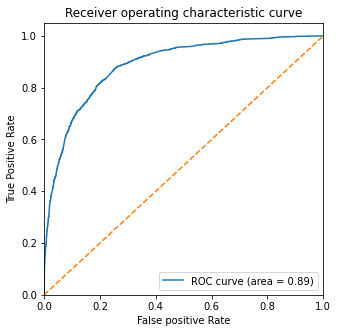

In [123]:
# Plot the roc curve
roccurve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [124]:
# Creating columns with different probability cutoffs to understand the prediction value at different cutoff's
probabilities = [float(x)/10 for x in range(10)]
for i in probabilities:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Preditedvalue,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.056623,0,1,0,0,0,0,0,0,0,0,0
1,0,0.212279,0,1,1,1,0,0,0,0,0,0,0
2,0,0.249897,0,1,1,1,0,0,0,0,0,0,0
3,0,0.092692,0,1,0,0,0,0,0,0,0,0,0
4,0,0.198630,0,1,1,0,0,0,0,0,0,0,0


## Insights:
- In the above step we have obtained Conversion values at different cutoff values

In [125]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Forming confusion matrix to find values of sensitivity, accuracy and specificity at each level of probablity value
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm1))    #total vale
    accuracy = (cm1[0,0]+cm1[1,1])/total  #accuracy
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])  #specificity
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])  #sensitivity
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.383117  1.000000  0.000000
0.1   0.1  0.620346  0.969115  0.403743
0.2   0.2  0.762771  0.910358  0.671111
0.3   0.3  0.796248  0.865160  0.753450
0.4   0.4  0.808802  0.771375  0.832047
0.5   0.5  0.815152  0.704331  0.883977
0.6   0.6  0.805772  0.628249  0.916023
0.7   0.7  0.781097  0.514124  0.946901
0.8   0.8  0.758730  0.422599  0.967485
0.9   0.9  0.712121  0.268927  0.987368


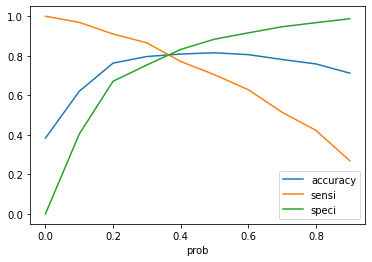

In [126]:
# Plotting the curve to find the optimal value
cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## Insights:
- We could observe that optimal value is around 0.35 lets consider this and make predictions in the next step.

In [127]:
# Find the final_predicted value after applying the optimal value
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Preditedvalue,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.056623,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.212279,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.249897,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.092692,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.198630,0,1,1,0,0,0,0,0,0,0,0,0


## Insights:
- We have obtained the final predited value by considering the optimal value at 0.35

## Evaluation on training data

In [128]:
confusionmatrix=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusionmatrix

array([[3435,  840],
       [ 491, 2164]], dtype=int64)

In [129]:
TP = confusionmatrix[1,1] # true positive 
TN = confusionmatrix[0,0] # true negatives
FP = confusionmatrix[0,1] # false positives
FN = confusionmatrix[1,0] # false negatives

print("True positive: ",TP)
print("True Neagtive: ",TN)
print("False positive: ",FP)
print("False Negative: ",FN)

True positive:  2164
True Neagtive:  3435
False positive:  840
False Negative:  491


In [130]:
# Precision
precision=TP/(TP+FP)
print("Precision value is:",precision)

#Recall
Recall=TP/(TP+FN)
print("Recall value is:",Recall)


Precision value is: 0.7203728362183754
Recall value is: 0.8150659133709981


## Insights:
- We have ontained the Precision value at 72%
- We have obtained Recall value at 81%.


## Prediction on test data

In [131]:
x_test

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4608,0.470588,0.136911,0.296667,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7935,0.117647,0.504724,0.222222,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4043,0.058824,0.001087,0.111111,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7821,0.117647,0.175485,0.222222,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
856,0.176471,0.109203,0.333333,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,0.470588,0.886119,0.444444,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8964,0.235294,0.103227,0.444444,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7064,0.411765,0.677493,0.777778,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4978,0.235294,0.610124,0.444444,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [132]:
columns2

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Do Not Email_Yes', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [133]:
# consider the columns we got using RFE(recursive feature elimination)
x_test=x_test[columns2]
x_test

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
4608,0.470588,0.136911,0.296667,0,0,0,0,1,0,0,0,0,0,0
7935,0.117647,0.504724,0.222222,0,0,1,0,0,0,0,1,0,0,0
4043,0.058824,0.001087,0.111111,0,0,1,0,0,0,0,1,0,0,0
7821,0.117647,0.175485,0.222222,0,0,0,0,0,1,0,0,0,0,0
856,0.176471,0.109203,0.333333,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,0.470588,0.886119,0.444444,0,0,0,1,1,0,0,0,0,0,0
8964,0.235294,0.103227,0.444444,0,0,0,1,1,0,0,0,0,0,0
7064,0.411765,0.677493,0.777778,0,0,0,0,0,0,0,0,0,0,0
4978,0.235294,0.610124,0.444444,0,0,0,1,1,0,0,0,0,0,0


In [134]:
# Adding constant to the test data 
x_test_sm = sm.add_constant(x_test)

### Making predictions on the test set

In [135]:
y_test_pred = res.predict(x_test_sm)

In [136]:
y_test_pred.head()

4608    0.244662
7935    0.031700
4043    0.005293
7821    0.738213
856     0.063757
dtype: float64

In [137]:
# Converting y_pred to a dataframe which was Pandas series
y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
# Let's see the head
y_pred_1.head()

,0
4608,0.244662
7935,0.031700
4043,0.005293
7821,0.738213
856,0.063757


In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [141]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

,Converted,CustID,0
0,1,4608,0.244662
1,0,7935,0.031700
2,0,4043,0.005293
3,0,7821,0.738213
4,0,856,0.063757


In [144]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [145]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Converted','Conversion_Prob']]

In [146]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Conversion_Prob
0,4608,1,0.244662
1,7935,0,0.031700
2,4043,0,0.005293
3,7821,0,0.738213
4,856,0,0.063757


In [147]:
# Applying the optimum threshold
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [148]:
y_pred_final.head()

,CustID,Converted,Conversion_Prob,final_predicted
0,4608,1,0.244662,0
1,7935,0,0.031700,0
2,4043,0,0.005293,0
3,7821,0,0.738213,1
4,856,0,0.063757,0


### Checking Accuracy, Precision and Recall on the testing data

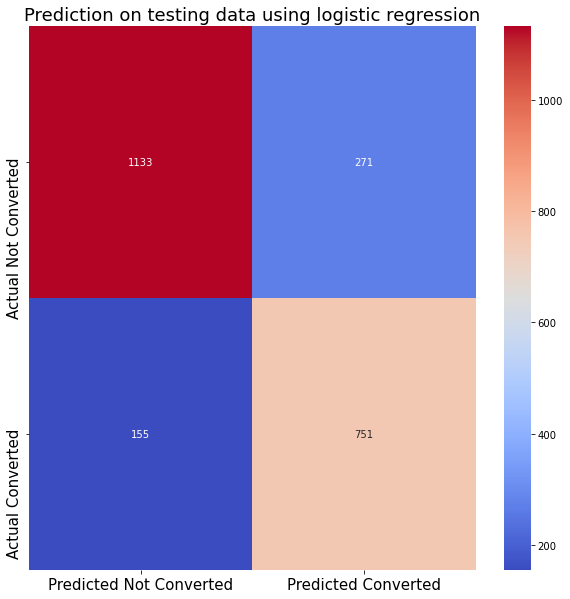

In [149]:
# Plotting the confusion matrix
cm3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm3,annot=True,cmap='coolwarm',fmt='d')
ax.set_title('Prediction on testing data using logistic regression',fontsize=18)
ax.set_xticklabels(['Predicted Not Converted','Predicted Converted'],fontsize=15)
ax.set_yticklabels(['Actual Not Converted','Actual Converted'],fontsize=15)

plt.show() 

In [150]:
# Accuracy on test data
acc = round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)*100
print("Accuracy is {}%".format(acc))

Accuracy is 82.0%


In [151]:
recall = round(recall_score(y_pred_final.Converted, y_pred_final.final_predicted),2)*100
print("Recall is {}%".format(recall))

Recall is 83.0%


## Insights:

#### `Training Data Recall value(in percentage): 81 %`
#### `Testing Data Recall value(in percentage): 83 %`

## Insights:
- Our main is to increase Recall value since we need to identify the Hot leads.
- We have good Recall value and now our model is able to predict higher Customers who are converting as Hot Leads
- We dont have much difference in Recall value from Train and Test. Which indicates good perfomance of our model.

## Insights:
- Model has performed well in both training and Test data and doesn't make much difference between train and Test data
- Since we have adjusted probability values in this approach when business startegy changes we can tune our model easily to obtain the perfomance.
- We have concentrated more on recall and it is achieved.Since we want to identify more Leads from this model.
- These are the Top features which is making the customers to convert as a Hot Lead:
    - Last Notable Activity_Had a Phone Conversation
    - Lead Origin_Lead Add Form
    - Total Visits and  Total Time spent on Website
    - Page Views per Visit
    - Last Activity: SMS Sent
    - What is your current occupation: unemployed,working professional